In [1]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

import visuals as vs

%matplotlib inline

data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

print "Boston dataset has {} data points with {} variables each.".format(*data.shape)

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python2.7/dist-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


Boston dataset has 489 data points with 4 variables each.


In [2]:
minimum_price = np.amin(prices)
maximum_price = np.amax(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation

**Answer:** 
- RM: if RM increases then MEDV increases, as RM indecates the number of rooms in a house which mean bigger house if increases
- LSTAT: if LSTAT increases then MEDV decreases, because this mean that neighbour are from lowerclass which mean that the houses of this area have lower prices
- PTRATIO: if PTRATIO increases then MEDV decreases, because this mean that the education is better.

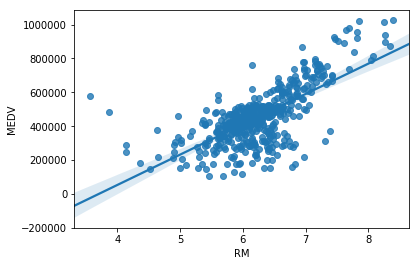

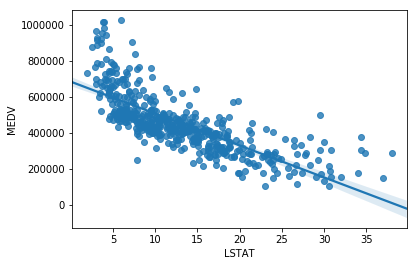

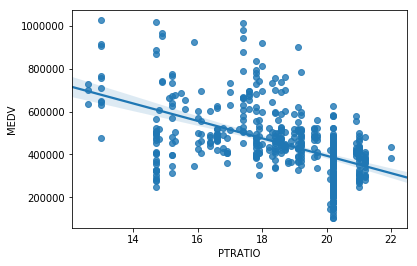

In [3]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

# visualize data more
import matplotlib.pyplot as plt
import seaborn as sns

for var in ['RM', 'LSTAT', 'PTRATIO']:
    sns.regplot(data[var], prices)
    plt.show()

### Question 2 - Goodness of Fit

In [4]:
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:**
- Yes
- because the r2_score euqals .923 which mean that a 92% of the dependent variable is predictable. Also it doesn't equal 0 which mean it make better than a model alwayes give the mean of the target values

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 10)
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
**Answer:**
- Splitting data give the model a training set to learn from and testing set to ensure the accuracy of the model. Also it is used to indentify the overfitting by the test data results observation and underfitting by train and test data results observation.

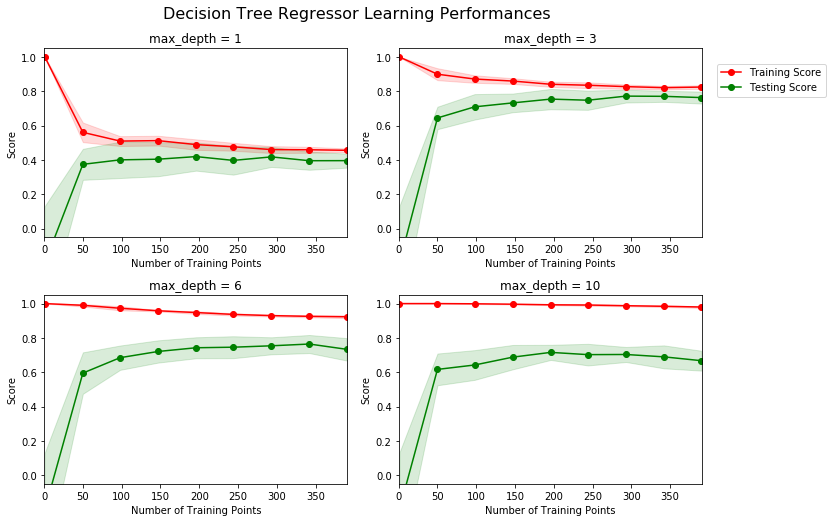

In [6]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
- maximum depth = 3
- The training curve score decreases as more training points are added and stoped decreasing at some point, but the testing curve score increases and coverge to the training curve.
- Adding more training points will not increase the accuracy as the curve has converged to its optimal score. So adding more data will consider as a cost which will not be benifit.

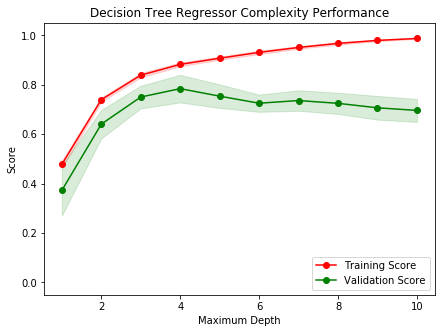

In [7]:
vs.ModelComplexity(X_train, y_train)

### Qustion 5 - Bias-Variance Tradeoff
**Answer:** 
* The model suffers from high bias, as the validation score and the training score are bad, which is clear in the graph that the validation score = .4 and training score = .46 approximately.
* The model suffers from high variance, as the score of training data is high but the score of validation data is low which mean overfitting.
***
### Question 6 - Best-Guess Optimal Model
**Answer:**
* Max depth of 4
* The score of validation and training data at max_depth=4 are convergence to each other, this is the peak of the curve which mean that this is the best fit model for our data.

### Question 7 - Grid Search
**Answer:**
* Grid search technique is an algorithm to determine the best hyper parameters which fit our data model the best
* It can be applied by making a table with the hyper parameters of the model and test the model with training and cross validation  data and measure our accuracy metrics and choose the best of them.
- As exmple in svm model we put the kernel and gamma with various values in a taple and check the f1_score each time.
***
### Question 8 - Cross-validation
**Answer:**
* This is a very useful algorithm which devide the data into k buckets and for k time, it takes a bucket as a validation data and the other k-1 as training data. After that it takes the average of them.
* An algorithm which splitting the data into k groups.It is more good to split the data into more splits to remove any possible bias and also get benifit of all data.If we do parameters tunning with one split out model will be good for this data but bad for others. Taking the avg is important to make the best model for all the splits together. When using k-fold with grid search we ensure that grid search output is the optimal for all the data not the validation set only. cv sets helps us to keep the testing data out while training the model.

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV

def fit_model(X,y):
    #cross validation sets
    cv_sets = ShuffleSplit(X.shape[0], n_iter=10, test_size=0.2, random_state=0)
    
    # decision tree regressor
    regressor = DecisionTreeRegressor()
    
    # dictionary for the parameter max_depth
    params = {'max_depth':list(range(1,11))}
    
    # Transformation of performance_metric into a scoring function
    scoring_fnc = make_scorer(performance_metric)
    
    # Creating the grid search cross validation object
    grid = GridSearchCV(regressor, params, scoring=scoring_fnc, cv=cv_sets)
    
    # Fitting the grid search cv object to the data to compute the optimal model
    grid = grid.fit(X, y)
    
    # Return optimal model
    return grid.best_estimator_

/usr/local/lib/python2.7/dist-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Question 9 - Optimal Model

In [9]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer:**
* Max_depth optimal is 4, It is equal to my prediction in question 6 as it gives the best fitting for the data.

***
### Question 10 - Predicting Selling Prices

In [12]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)
features.describe()

Predicted selling price for Client 1's home: $406,933.33
Predicted selling price for Client 2's home: $232,200.00
Predicted selling price for Client 3's home: $938,053.85


,RM,LSTAT,PTRATIO
count,489.000000,489.000000,489.000000
mean,6.240288,12.939632,18.516564
std,0.643650,7.081990,2.111268
min,3.561000,1.980000,12.600000
25%,5.880000,7.370000,17.400000
50%,6.185000,11.690000,19.100000
75%,6.575000,17.120000,20.200000
max,8.398000,37.970000,22.000000


**Answer:**
- Client 1 : $406,933.33, Client 2: $232,200.00, Client 3: $938,053.85
- Yes, they seem reasonable as the biggest home is the most expensive one.
In data exploration, the maximum price is = 1,027,800, and as shown in the above table, the maximum number of RM is 8.398 and the minimum number of PTRATIO = 12.6 which are almost equal to client 3 house so 938,053.85 is reasonable. The same for client 2 which has LSTAT = 32% which is a little bit different from the max value at the above table and PTRATIO = 22 which is equal to the maximum in the above table but, so it is reasonaple also to sell the house with 232,200. And for client 1, He has 5 rooms, LSTAT = 17 and PTRATIO=15 which is close to the mean but a bit smaller from it in features, so 406 thousand which is smaller than 454 thousands a little also so it is reasonable.

In [13]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $424,935.00
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $418,377.27
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $73,357.39


### Question 11 - Applicability
**Answer:**
- No, It shouldn't be used in real-world setting. It needs more work to do such thing. The features aren't sufficient for real world pricing, We have to consider other features like the square area and the number of floors .. etc. Also, the data can't be applied in different environment like rural city, and need not to consider very heavily the neighborhood status, It matters more the home and his owner status.